In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from scipy.stats import kruskal
import scikit_posthocs as sp

In [2]:
path = Path('../../data/results/experiment4')

In [14]:
# fitness plots
no_nn = pd.read_csv(path/'no_nn_mof.csv')
nn_normal_rand = pd.read_csv(path/'nn-normal-random_mof.csv')
nn_dist_rand = pd.read_csv(path/'nn-distribution-random_mof.csv')
nn_dropout_rand= pd.read_csv(path/'nn-dropout-random_mof.csv')
labels = ['no_nn', 'nn_normal_rand', 'nn_dist_rand', 'nn_drop_rand']

x=np.array([no_nn.mof, nn_normal_rand.mof, nn_dist_rand.mof,nn_dropout_rand.mof])

stat, p = kruskal(no_nn,nn_normal_rand,nn_dist_rand,nn_dropout_rand)
pc = sp.posthoc_conover(x, p_adjust='holm', val_col='values', group_col='groups')
pc.columns = labels
pc.index = labels
print('Statistics=%.3f, p=%.3f' % (stat, p))
display(pc)

Statistics=73.620, p=0.000


,no_nn,nn_normal_rand,nn_dist_rand,nn_drop_rand
no_nn,-1.000000e+00,1.620460e-23,1.174659e-02,3.013234e-04
nn_normal_rand,1.620460e-23,-1.000000e+00,5.146672e-17,3.023608e-14
nn_dist_rand,1.174659e-02,5.146672e-17,-1.000000e+00,2.240537e-01
nn_drop_rand,3.013234e-04,3.023608e-14,2.240537e-01,-1.000000e+00


/Users/maryam/anaconda3/envs/denn/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


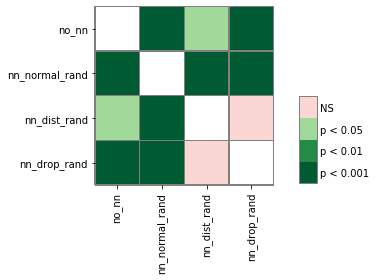

In [33]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
ax,cbar = sp.sign_plot(pc, **heatmap_args)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels, rotation='horizontal')
plt.tight_layout()
plt.savefig(path/'KrusKal-Wallis.eps')